In [1]:
function LogReg(U,y)
    MAX_ITS = 1000
    epsilon = sqrt(eps())         #eps() is too small for my taste, so I cut down some orders of magnitude
    
    (m,n) = size(U)
    
    U = [U ones(m,1)]             #append 1s as the last feature (for regularization
    
    scale = maximum(U,1)
    U = U ./ scale                #scale U for better performance
    
    l = maximum(sum(U,1))         #l is the global Lipschitz constant = max {sum observations for a given feature}
    a = rand(n+1,1)               #weights are initialized randomly
    
    for i = 1:MAX_ITS
        x = exp(U*a)              #this is the "inner" function of the sigmoid
        sig = x ./ (1 + x)        #value of the sigmoid for this iteration
        dL = U'*(y - sig)         #gradient of L
        a = a + dL/l              #take a step
        
        if(norm(dL/l) < epsilon)  #if we are not making substantial progress
            break;                # then stop looping
        end
        
    end
    
    return a ./ scale';            #return to the normal scaling
end

LogReg (generic function with 1 method)

In [2]:
(raw_data,headings) = readdlm("binary.csv",','; header = true)
y = raw_data[:, 1]
U = raw_data[:, 2:3]        #only 2:3 since instructions state only to use two features

a = LogReg(U,y)

3x1 Array{Float64,2}:
  0.00270866
  0.382477  
 -3.67484   

In [3]:
using PyPlot

INFO: Loading help data...


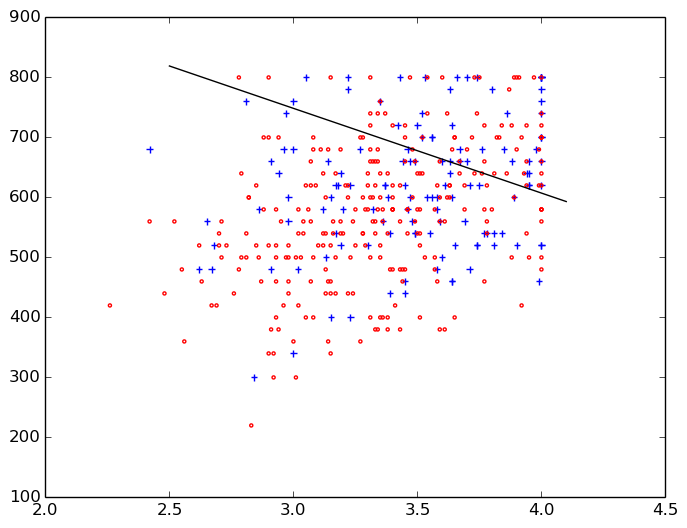

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbcfb8e19e8>

In [4]:
figure()
positives = (y.==1)   #logical indexing
scatter(U[positives,2], U[positives,1], marker="+", color="b")
scatter(U[!positives,2], U[!positives,1], marker="o", facecolors="none", color="r", s=5)

bdy_x = vec(2.5:0.1:4.1)                     #decision boundary
bdy_y = (-a[2]*bdy_x-a[3]-0.5)/a[1]
plot(bdy_x, bdy_y, color="black")